# Embedding text column(s)

In [39]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # scikit-learn
from sklearn.cluster import KMeans
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import LinearRegression
from collections import Counter
import wordcloud
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

import umap.umap_ as umap

In [14]:
# load test dataset
train = pd.read_csv('/work/datascience_exam/data/train.csv', index_col=0)

In [15]:
# divide data into X and y (train)
X_train = train.iloc[:,:4].values # all rows, column 1 to (not incl) 4
y_train = train.iloc[:,4].values # all rows, column 4

In [5]:
X_train.shape

(515049, 4)

In [8]:
y_train.shape

(515049,)

## Embedding 'Country' using sbert 

In [655]:
# choose model
model = SentenceTransformer("all-MiniLM-L6-v2")

/Users/sigridagersnapbomnielsen/Documents/Python/datascience_spring24/predict_death/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [656]:
X_train[:,1]

array(['Germany',
       'United States of America; Soviet Union; Russian Empire', 'Canada',
       ..., 'Germany', 'United States of America',
       'United Kingdom of Great Britain and Ireland'], dtype=object)

In [16]:
#columns_to_embed = ['Country']#, 'column1']  # Change this to your actual column names
# sentences need to be in list format 
country = X_train[:,1].tolist()

In [17]:
embeddings = model.encode(country)

In [20]:
embeddings.shape

(515049, 384)

#### I have my embeddings, now I want to cluster them.

In [29]:
# initialize kmeans with 3 centroids from scikitlearn 
kmeans = cluster.KMeans(n_clusters=5, random_state=42)

In [30]:
kmeans.fit()

KMeans(n_clusters=5, random_state=42)

In [31]:
 # fit the model
kmeans.fit(embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


KMeans(n_clusters=5, random_state=42)

In [32]:
# store cluster labels in a variable
clusters = kmeans.labels_


In [34]:
clusters.shape

(515049,)

In [38]:
X_train.shape

(515049, 4)

In [78]:
# reshape np array to add to X_train
clusters_reshaped = clusters.reshape(-1, 1)


In [80]:
clusters_reshaped.shape

(515049, 1)

In [94]:
X_train_w_clusters = np.hstack((X_train, clusters_reshaped))

In [102]:
X_train_w_clusters[6][4] # cluster number!!!

3

In [96]:
X_train_w_clusters[0]

array([1, 'Germany', 'Religious figure', 1802, 1], dtype=object)

In [117]:
X_train_w_clusters[5][4]
X_train_w_clusters[:][4]
X_train_w_clusters[:,4]

array([1, 3, 1, ..., 1, 2, 2], dtype=object)

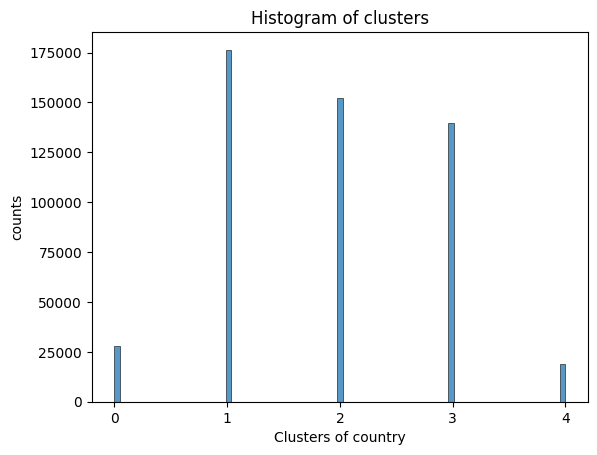

In [122]:
sns.histplot(X_train_w_clusters[:,4])
plt.xlabel('Clusters of country')
plt.ylabel('counts')
plt.title('Histogram of clusters')
plt.xticks([0,1,2,3,4])
plt.show()

In [125]:
embeddings.shape

(515049, 384)

In [133]:
df = pd.DataFrame()

In [130]:
def dimension_reduction(embedding):

    pca = PCA(n_components=2, random_state=42)

    pca_vecs = pca.fit_transform(embedding)

    # save our two dimensions into x0 and x1
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]
    
    df['x0'] = x0 
    df['x1'] = x1

In [131]:
def plot_pca(x0_name, x1_name, cluster_name, method):

    plt.figure(figsize=(12, 7))

    plt.title(f"TF-IDF + KMeans 20newsgroup clustering with {method}", fontdict={"fontsize": 18})
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})

    sns.scatterplot(data=df, x=x0_name, y=x1_name, hue=cluster_name, palette="viridis")
    plt.show()

In [134]:
dimension_reduction(embeddings)

In [ ]:
plot_pca(df['x0'], df['x1'], clusters, 'sbert')

## Embedding occupation using sbert

In [6]:
# choose model
model_sbert = SentenceTransformer("all-MiniLM-L6-v2")

/work/datascience_exam/env/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
X_train[:,2] # occupation 

array(['religious figure', 'artist', 'politician', ..., 'artist',
       'politician', 'athlete'], dtype=object)

In [8]:
X_train.shape

(515049, 4)

In [9]:
occupation_list = X_train[:,2].tolist()

In [ ]:
occupation_list

In [11]:
occupation_embeddings = model_sbert.encode(occupation_list) # 5 min on my local com? why 37 min now?? 
# save embeddings...

In [14]:
occupation_embeddings_pd = pd.DataFrame(occupation_embeddings)

In [17]:
occupation_embeddings_pd.to_csv('/work/datascience_exam/data/occupation_embeddings.csv')

### Attempting UMAP

In [18]:
# standardize data first? why? 

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components = 2)#, random_state = 42) 
# setting a random seed turns of parallelization and subsequently takes much longer to run. for testing, we eon't set a random seed
occupation_umap = umap_reducer.fit_transform(occupation_embeddings)

occupation_umap_pd = pd.DataFrame(occupation_umap)
occupation_umap_pd.to_csv('/work/datascience_exam/data/occupation_umap.csv') # 293 min?? wtf?

In [ ]:
# Save UMAP ? 
occupation_umap.to_csv('/work/datascience_exam/data/occupation_umap.csv')

In [ ]:
#for x,y,name in zip([X_train, X_val, X_test],
#                    [y_train, y_val, y_test],
#                    ['train', 'val', 'test']):
#    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
#    df.columns = data.columns
#    df.to_csv(f'data/{name}.csv')

/tmp/ipykernel_1322/2229309785.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(occupation_umap[:, 0], occupation_umap[:, 1], cmap='viridis', s=50)


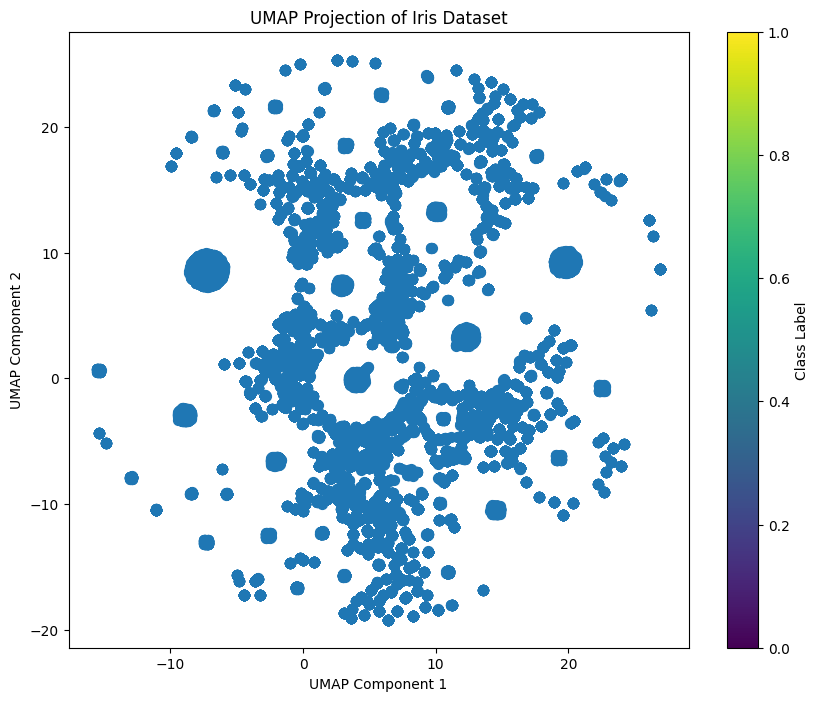

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(occupation_umap[:, 0], occupation_umap[:, 1], cmap='viridis', s=50)
plt.title('UMAP Projection of Iris Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Class Label')
plt.show()

what I'm trying to do?
- testing umap - is it better with 50 dimensions when clustering than the pca
- try t-sne, too. write about it. 
    - t-sne is often used for plotting, but can reduce to e.g., 50 dimensions, too. 

In [40]:
occupation_embeddings.shape

(515049, 384)

### clustering first? yes!

/tmp/ipykernel_12552/2003847804.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')


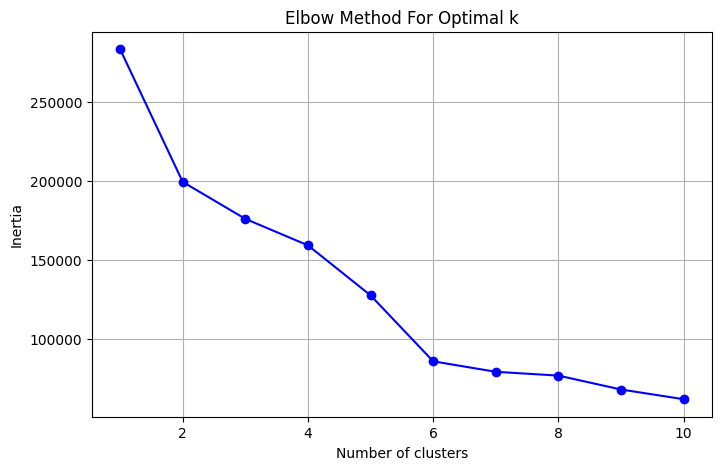

In [16]:

# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(occupation_embeddings)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [41]:
# sample dataset (or reduce number of rows for testing code)
embed_subset = occupation_embeddings[:10000,:]
embed_subset.shape


(10000, 384)

/tmp/ipykernel_1322/1226797528.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, silhouette_avg, 'bo-', marker='o')


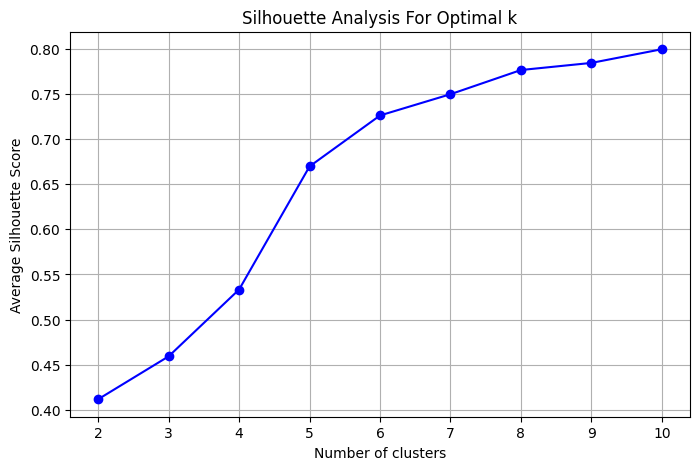

In [42]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis to find the optimal number of clusters
silhouette_avg = []
K = range(2, 11)  # Silhouette score is not defined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(embed_subset)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(embed_subset, cluster_labels))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_avg, 'bo-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid(True)
plt.show()


In [17]:
#from sklearn.cluster import KMeans

def clustering(embedded_data, n_clusters, X_train_data):
    X_train_w_clusters = []

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embedded_data)

    clusters = kmeans.labels_
    X_train_w_clusters =  np.hstack((X_train_data, clusters.reshape(-1,1)))

    return(X_train_w_clusters)


In [18]:
#X_train_w_clusters = clustering(occupation_umap, 6, X_train)

NameError: name 'occupation_umap' is not defined

In [19]:
X_train_w_clusters = clustering(occupation_embeddings, 7, X_train)
X_train_w_clusters.shape

(515049, 5)

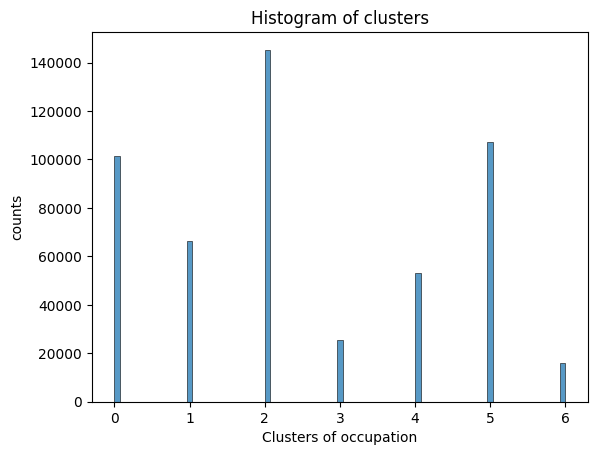

In [20]:
sns.histplot(X_train_w_clusters[:,4])
plt.xlabel('Clusters of occupation')
plt.ylabel('counts')
plt.title('Histogram of clusters')
#plt.xticks([0,1,2,3,4,5])
plt.show()

In [46]:
# Wordcloud function

def wordcloud_of_cluster(clustered_data, cluster_no):
    # filter cluster no
    cluster = clustered_data[clustered_data[:, 4] == cluster_no]
    
    # 
    cluster_pd = pd.DataFrame(cluster, columns=['idx', 'Country', 'Occupation', 'Birth_year', 'cluster_no'])
    word_list = [word.strip() for sublist in cluster_pd['Occupation'].str.split(';') for word in sublist]
    count = Counter(word_list)

    return(count)

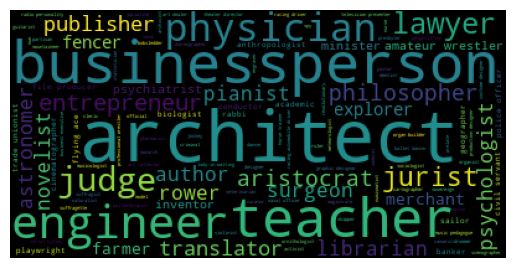

In [56]:
count = wordcloud_of_cluster(X_train_w_clusters, 0)
#count.most_common(20)
wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()

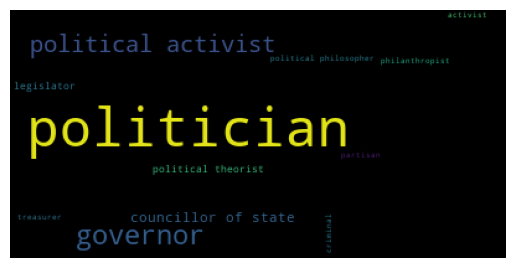

In [57]:
count = wordcloud_of_cluster(X_train_w_clusters, 1)

wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()

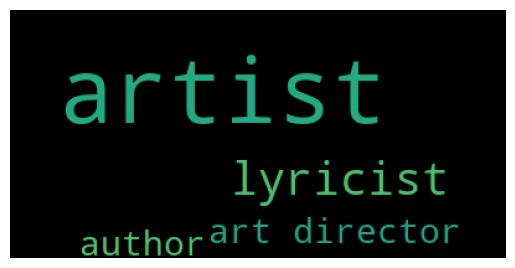

In [58]:
count = wordcloud_of_cluster(X_train_w_clusters, 2)

wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()

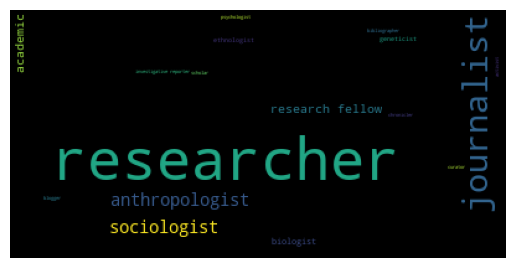

In [59]:
count = wordcloud_of_cluster(X_train_w_clusters, 3)

wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()

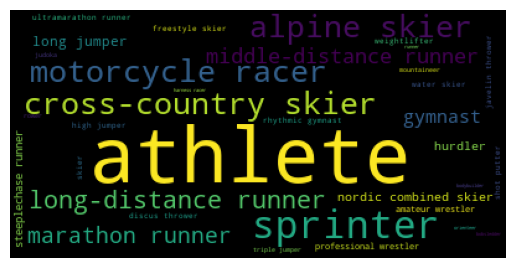

In [60]:
count = wordcloud_of_cluster(X_train_w_clusters, 4)

wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()


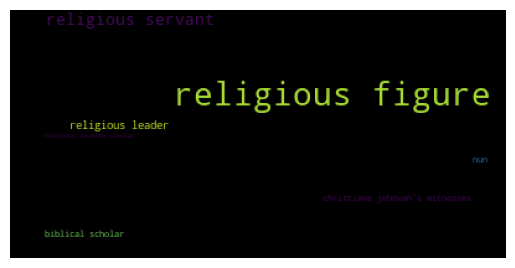

In [61]:
count = wordcloud_of_cluster(X_train_w_clusters, 5)

wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()

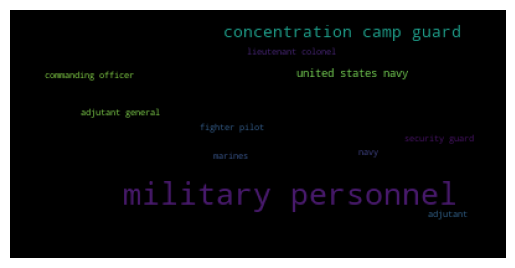

In [62]:
count = wordcloud_of_cluster(X_train_w_clusters, 6)

wordcloud_temp = wordcloud.WordCloud().generate_from_frequencies(count)
plt.imshow(wordcloud_temp)#, interpolation='bilinear')
plt.axis("off")
plt.show()

### dimensionality reduction - PCA

In [63]:
pca = PCA(n_components= 250, random_state=42)
pca_vecs = pca.fit_transform(occupation_embeddings)


In [66]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)


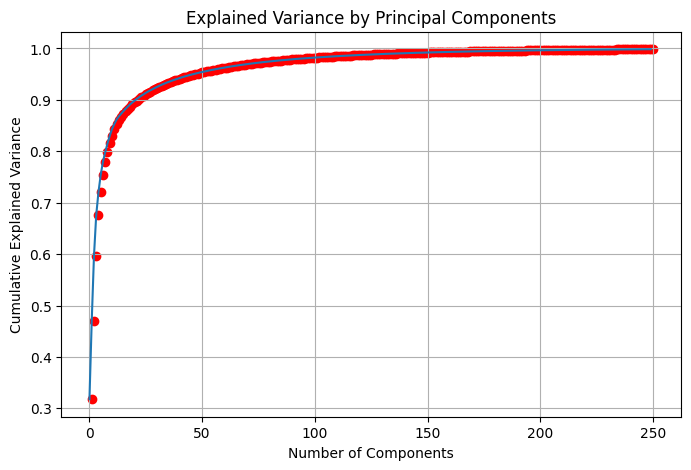

In [67]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance))
plt.scatter(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [68]:
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components needed to explain {threshold*100}% variance: {num_components}")


Number of components needed to explain 95.0% variance: 48


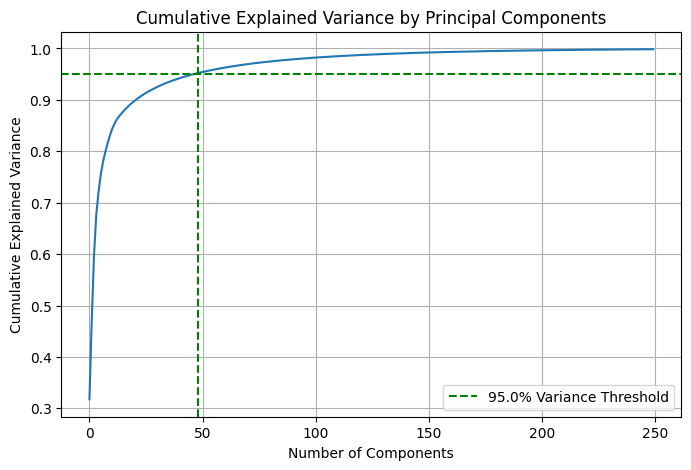

In [69]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance))
#plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')
#plt.scatter(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='r')
plt.axhline(y=threshold, color='g', linestyle='--', label=f'{threshold*100}% Variance Threshold')
plt.axvline(x=num_components, color='g', linestyle='--')

# Adding labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.legend()
plt.show()

#### PCA dimension reduction magic number is 48

In [38]:
# function which takes embeddings and performs PCA with 48 dimensions

In [11]:
occupation_embeddings = pd.read_csv('/work/datascience_exam/data/occupation_embeddings.csv', index_col=0)
occupation_embeddings = occupation_embeddings.to_numpy()

In [21]:
def dimension_reduction_comp(embedded_data, components, X_train_data):
    total_variance_explained = []

    pca = PCA(n_components=components, random_state=42)

    pca_vecs = pca.fit_transform(embedded_data)

    explained_variance = pca.explained_variance_ratio_
    
    # Calculate the total variance explained by the specified number of components
    total_variance_explained = np.sum(explained_variance) * 100
    print(f"Total variance explained by the first {components} components: {total_variance_explained:.2f}%")

    #X_train_w_pca_vecs =np.empty(shape = (515049, 1))
    full_data = np.hstack((X_train_data, pca_vecs))
    
    return(full_data, pca_vecs)

In [28]:
X_train_w_pca_vecs, pca_vecs = dimension_reduction_comp(occupation_embeddings, 48, X_train_w_clusters)

Total variance explained by the first 48 components: 95.10%


In [29]:
pca_vecs.shape
# try clustering on pca_vecs!!! might be better now that it has 48 dimensions and not 250

(515049, 48)

In [35]:
X_train_w_clusters[:,4]

array([0, 2, 5, ..., 2, 5, 1], dtype=object)

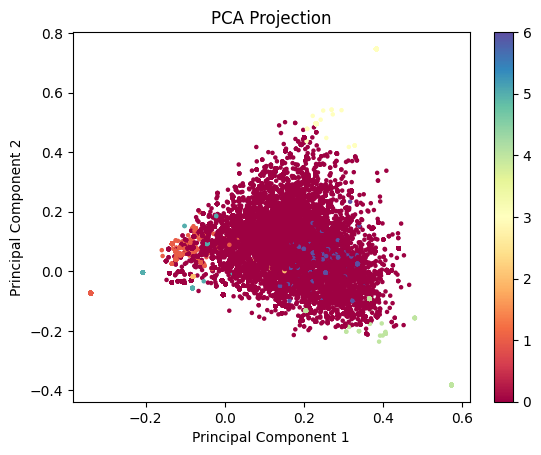

In [37]:
# Assuming 'labels' are your class labels or cluster assignments
plt.scatter(pca_vecs[:, 0], pca_vecs[:, 1], c=X_train_w_clusters[:,4], cmap='Spectral', s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.colorbar()
plt.show()

In [ ]:
# Perform clustering on the reduced data
kmeans = KMeans(n_clusters=7)
cluster_labels = kmeans.fit_predict(pca_vecs)

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_vecs, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
# last thing to try: visually inspect clusters after pca_vectors have been made 

#### Investigating the reconstruction error of the PCA

In [49]:
# Quality checking PCA vecs by calculating the reconstruction error
n_components = 48
pca = PCA(n_components=n_components, random_state=42)

# pca_vecs have already been made.- try to make them again
pca_vecs = pca.fit_transform(occupation_embeddings)

pca.components_

# reconstruct reduced data
reconstructed_data = pca.inverse_transform(pca_vecs) # doesn't work for some reason

# Calculate reconstruction error (mean squared error, MSE)
reconstruction_error = np.mean((occupation_embeddings - reconstructed_data) ** 2)
#print(f"Reconstruction Error: {reconstruction_error}")
print(f"Reconstruction Error: {reconstruction_error: .10f}") # without scientific notation 


Reconstruction Error: 7.018147822719225e-05


very low number. I'll allow it :-)

##### Pairwise distance preservation

In [51]:
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise distances in the original and reduced spaces
original_distances = pdist(occupation_embeddings)
reduced_distances = pdist(pca_vecs)

# Compute the correlation between original and reduced distances
correlation = np.corrcoef(original_distances, reduced_distances)[0, 1]
print(f"Correlation between Original and Reduced Pairwise Distances: {correlation}")


: 

## other stuff

In [38]:
X_train_w_pca_vecs[5,0:8] # checking out the array

array([1, 'France', 'journalist', 1879, 3, -0.2822265326976776,
       -0.005206998437643051, 0.20559027791023254], dtype=object)

In [40]:
# save 
np.save('/work/datascience_exam/data/oc_pca_train.npy', X_train_w_pca_vecs)

In [42]:
#X_train_w_pca= np.load('/work/datascience_exam/data/oc_pca_train.npy', allow_pickle=True)

### Clustering the PCA vectors - skip if done already

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_18139/4113629638.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')


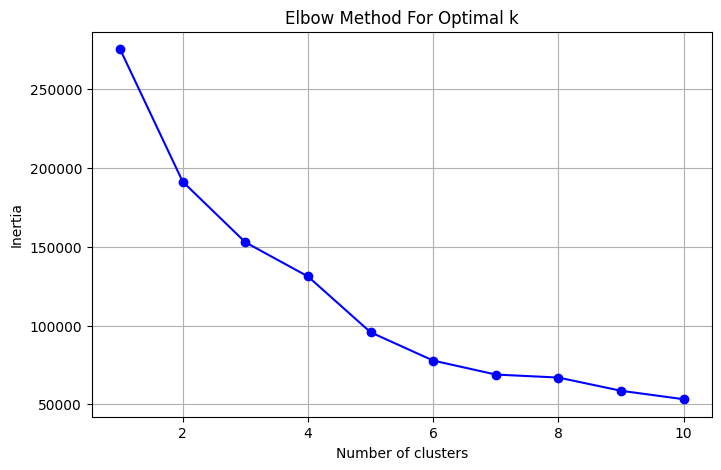

In [415]:

# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_vecs)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [416]:
# sample dataset (or reduce number of rows for testing code)
pca_vecs_subset = pca_vecs[:1000,:]
pca_vecs_subset.shape


(1000, 250)

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_18139/3401238058.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, silhouette_avg, 'bo-', marker='o')


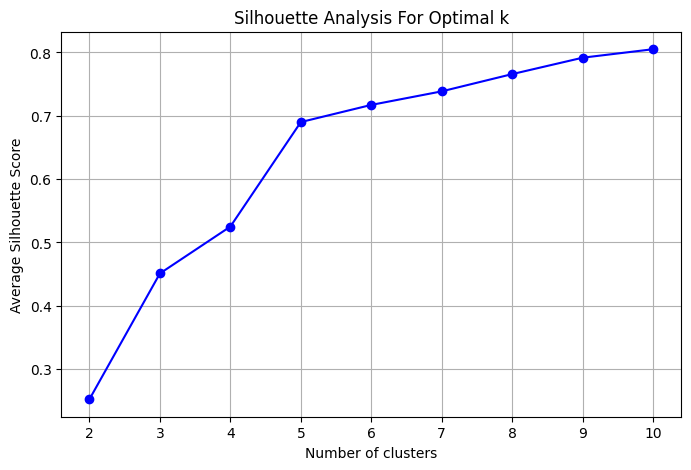

In [417]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis to find the optimal number of clusters
silhouette_avg = []
K = range(2, 11)  # Silhouette score is not defined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_vecs_subset)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(pca_vecs_subset, cluster_labels))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_avg, 'bo-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid(True)
plt.show()


From chat: Running silhouette analysis can be computationally intensive, especially for larger datasets or a high range of cluster numbers. If your code is taking an unusually long time, it could be due to the following reasons:

- Large Dataset: If your dataset is very large, the silhouette score calculation will take longer.
- High Dimensionality: High-dimensional data can increase computational complexity.
- Number of Clusters Tested: Testing a large range of cluster numbers (e.g., from 2 to 100 or more) can significantly increase the runtime.

To identify potential issues and optimize the code, here are some steps you can take:

- Reduce the Range of Clusters: Start with a smaller range of clusters to see if the analysis completes in a reasonable time.
- Sample the Data: Use a smaller sample of your dataset to get an initial estimate.
- Check for Errors: Ensure there are no logical errors in the loop or the data being passed to the clustering algorithm.

5 clusters might be the way to go.

In [418]:
kmeans_oc = cluster.KMeans(n_clusters=5, random_state=42)
kmeans_oc.fit(pca_vecs)

clusters_oc = kmeans_oc.labels_
clusters_oc_reshaped = clusters_oc.reshape(-1, 1)

X_train_w_oc_clusters =  np.hstack((X_train, clusters_oc_reshaped))

KMeans(n_clusters=5, random_state=42)

In [421]:
X_train_w_oc_clusters

array([[1, 'Germany', 'researcher', 1829, 4],
       [1, 'United States of America', 'athlete', 1935, 0],
       [1, 'United Kingdom', 'artist', 1954, 1],
       ...,
       [1, 'United Kingdom', 'athlete', 1928, 0],
       [1, 'United States of America', 'politician', 1840, 2],
       [1, 'Austria-Hungary', 'artist', 1849, 1]], dtype=object)

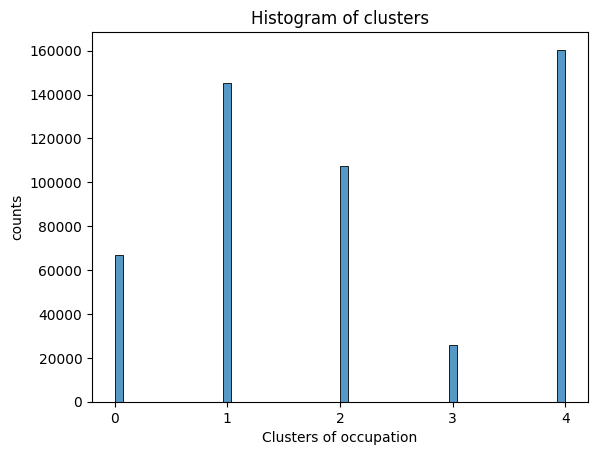

In [424]:
sns.histplot(X_train_w_oc_clusters[:,4])
plt.xlabel('Clusters of occupation')
plt.ylabel('counts')
plt.title('Histogram of clusters')
plt.xticks([0,1,2,3,4])
plt.show()

# Quick and dirty analysis - can I predict age of death by using the predictors of: gender, occupation_clusters, and birth_year? 

In [44]:
X_train_w_pca_vecs[4,0:9]

array([1, 'United States of America', 'architect', 1888, 0,
       0.08846291154623032, -0.012277638539671898, 0.2551773488521576,
       -0.004899174440652132], dtype=object)

In [45]:
X_train_gender = X_train_w_pca_vecs[:,0]

In [46]:
X_train_predictors = X_train_w_pca_vecs[:,3:]

In [47]:
# merge
X_train_predictors = np.hstack((X_train_gender.reshape(-1,1), X_train_predictors))

In [48]:
X_train_predictors

array([[1, 1802, 0, ..., -0.006425196770578623, 0.011249436065554619,
        0.004026276990771294],
       [2, 1884, 3, ..., -0.004694965668022633, 0.00615534745156765,
        0.03811401128768921],
       [1, 1896, 2, ..., -0.009284169413149357, 0.007633041124790907,
        0.000980375916697085],
       ...,
       [1, 1876, 3, ..., -5.700847759726457e-05, 0.00016401337052229792,
        0.00017116758681368083],
       [1, 1928, 2, ..., 0.00018319896480534226, -0.0005523464642465115,
        0.00030117304413579404],
       [1, 1860, 1, ..., -1.9409502783673815e-05, 7.097233174135908e-05,
        -0.001332309446297586]], dtype=object)

#### reloading data / saving data

In [647]:
#train = pd.read_csv('data/train.csv', index_col=0)

In [62]:
np.save("data/train_embedded", X_train_predictors, allow_pickle=True)

In [64]:
test = np.load("data/train_embedded.npy", allow_pickle=True)

## trying to build dummy, base and full model (full model will be tested using both KNN linear regressiona and??)

In [67]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

#MSE? yes?

### How to do this:
- Only use test data set

Models to build:
- a dummy model: mean of y
- a baseline model: using only gender? 
- full model:
    - a simple linear regression
    - a non-parametric linear regression KNN
    - a simple decision tree

All? or only the full models should be trained using CV and should be heavily regularized (_standardize_ first?). 
All models should be compared using the same error metric: mean squarred error 

choosing the best model, validate it, and then test it:
- investigate interpretability, feature importance, etc. 


In [68]:
performances = []

In [69]:
y_train.shape
X_train_predictors.shape

(515049, 51)

In [70]:
### Dummy model  -  mean of y

mean_value = y_train.mean()
model_name = 'dummy'
performance = np.sqrt(mean_squared_error(y_train, [mean_value]*y_train.shape[0]))
r2 = r2_score(y_train, [mean_value]*y_train.shape[0])
performances.append({'model': model_name,
                     'split': 'train',
                     'rmse': performance.round(4),
                     'r2': r2.round(4)})



In [71]:
### Baseline model - only predictor is gender - linear regression

gender = X_train_predictors[:,0].reshape(-1,1)
#gender = gender.reshape(-1,1)
reg = LinearRegression().fit(gender, y_train)

preds =  reg.predict(gender)
r2 = r2_score(y_train, preds)
performance = np.sqrt(mean_squared_error(y_train, preds))
performances.append({'model': 'linear-gender',
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})


In [72]:
# standardize embedded data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_pred_scaled = scaler.fit_transform(X_train_predictors[:,3:])

In [73]:
non_scaled_cols = X_train_predictors[:,:3]
#X_train_pred_scaled.shape

In [74]:
X_train_predictors_scaled = np.hstack((non_scaled_cols, X_train_pred_scaled))

In [76]:
### full linear model 
# cv? - this is not working out 
# regularization? 

reg = LinearRegression().fit(X_train_predictors_scaled, y_train)

preds =  reg.predict(X_train_predictors_scaled)
r2 = r2_score(y_train, preds)
performance = np.sqrt(mean_squared_error(y_train, preds))
performances.append({'model': 'linear-full-scaled',
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})



In [78]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Perform cross-validation with RMSE as the scoring metric
scores = cross_val_score(model, X_train_predictors_scaled, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Calculate the average RMSE and standard deviation
rmse_scores = -scores  # Convert negative RMSE scores to positive
#print(f"Mean RMSE: {rmse_scores:.2f}") #, Standard Deviation of RMSE: {std_rmse:.2f}")



In [79]:
model_fit = model.fit(X_train_predictors_scaled, y_train)

preds =  model_fit.predict(X_train_predictors_scaled)
r2 = r2_score(y_train, preds)
performance = np.sqrt(mean_squared_error(y_train, preds))
performances.append({'model': 'linear-full-scaled-cv',
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [80]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 15.9491, 'r2': 0.0},
 {'model': 'linear-gender', 'rmse': 15.9302, 'r2': 0.0024},
 {'model': 'linear-full-scaled', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'linear-full-scaled-cv', 'rmse': 15.5674, 'r2': 0.0473}]

In [81]:
### full model but using polynomial linear regression
from sklearn.preprocessing import PolynomialFeatures

X_train_copy = X_train_predictors_scaled.copy()

poly = PolynomialFeatures(2)

X_train_copy = poly.fit_transform(X_train_copy)
reg = LinearRegression().fit(X_train_copy, y_train)
preds = reg.predict(X_train_copy)
r2 = r2_score(y_train, preds)
performance = np.sqrt(mean_squared_error(y_train, preds))
performances.append({'model': 'poly-allpreds-3',
                    'split': 'train',
                    'rmse': performance.round(4),
                    'r2': r2.round(4)})
       

In [82]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 15.9491, 'r2': 0.0},
 {'model': 'linear-gender', 'rmse': 15.9302, 'r2': 0.0024},
 {'model': 'linear-full-scaled', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'linear-full-scaled-cv', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'poly-allpreds-3', 'split': 'train', 'rmse': 15.38, 'r2': 0.0701}]

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
# full model but using KNN linear regression

for k in [3,5,10,20,30]:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_predictors, y_train)
    #pkl.dump(neigh, file=open(f'example-models/knn-allpreds-{k}.pkl', 'wb')) # save the model

    preds = neigh.predict(X_train_predictors)

    r2 = r2_score(y_train, preds)
    performance = np.sqrt(mean_squared_error(y_train, preds))
    performances.append({'model': f'knn-allpreds-{k}',
                            'split': 'train',
                            'rmse': performance.round(4),
                            'r2': r2.round(4)})

In [88]:
k = 100
neigh = KNeighborsRegressor(n_neighbors=k)
neigh.fit(X_train_predictors, y_train)
#pkl.dump(neigh, file=open(f'example-models/knn-allpreds-{k}.pkl', 'wb')) # save the model

preds = neigh.predict(X_train_predictors)

r2 = r2_score(y_train, preds)
performance = np.sqrt(mean_squared_error(y_train, preds))
performances.append({'model': f'knn-allpreds-{k}',
                        'split': 'train',
                        'rmse': performance.round(4),
                        'r2': r2.round(4)})

In [93]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 15.9491, 'r2': 0.0},
 {'model': 'linear-gender', 'rmse': 15.9302, 'r2': 0.0024},
 {'model': 'linear-full-scaled', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'linear-full-scaled-cv', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'poly-allpreds-3', 'split': 'train', 'rmse': 15.38, 'r2': 0.0701},
 {'model': 'knn-allpreds-3', 'split': 'train', 'rmse': 15.6453, 'r2': 0.0377},
 {'model': 'knn-allpreds-5', 'split': 'train', 'rmse': 15.0149, 'r2': 0.1137},
 {'model': 'knn-allpreds-10', 'split': 'train', 'rmse': 14.5352, 'r2': 0.1694},
 {'model': 'knn-allpreds-20', 'split': 'train', 'rmse': 14.3129, 'r2': 0.1947},
 {'model': 'knn-allpreds-30', 'split': 'train', 'rmse': 14.2469, 'r2': 0.2021},
 {'model': 'knn-allpreds-100',
  'split': 'train',
  'rmse': 14.2103,
  'r2': 0.2062}]

In [92]:
## random forrest og feature importance 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [95]:
rfreg = RandomForestRegressor(random_state=42) # first, we instantiate the estimator


In [96]:

param_grid = { 
    'n_estimators': [10, 20, 100, 200, 500],
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': [0.3, 0.6, 0.9], # can you guess what this is, without looking at the documentation?
    'ccp_alpha': [0.01, 0.1, 1.0]
}

In [97]:
# cv
cv_rfr = RandomizedSearchCV(estimator=rfreg, # I am choosing RandomizedSearchCV for speed, but you can also go for GridSearchCV :)
                            param_distributions=param_grid,
                            scoring='neg_mean_squared_error', # this is "neg" because CV wants a metric to maximize
                            n_iter=20, # this should more likely be above 100, and in general the higher the better
                            cv=5)
cv_rfr.fit(X_train_predictors_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'ccp_alpha': [0.01, 0.1, 1.0],
                                        'max_depth': [2, 3, 5, 10],
                                        'max_features': [0.3, 0.6, 0.9],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 100, 200,
                                                         500]},
                   scoring='neg_mean_squared_error')

In [99]:
cv_rfr.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [101]:
import pickle as pkl
random_forrest_model = cv_rfr.fit(X_train_predictors_scaled, y_train)


KeyboardInterrupt: 

In [ ]:
# save model 
pkl.dump(random_forrest_model, file=open(f'models/random_forrest.pkl', 'wb')) # save the model

In [121]:
model = cv_rfr.best_estimator_

preds = model.predict(X_train_predictors_scaled)
r2 = r2_score(y_train, preds)
performance = np.sqrt(mean_squared_error(y_train, preds))
performances.append({'model': 'random_forrest',
                         'split': 'train',
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [127]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 15.9491, 'r2': 0.0},
 {'model': 'linear-gender', 'rmse': 15.9302, 'r2': 0.0024},
 {'model': 'linear-full-scaled', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'linear-full-scaled-cv', 'rmse': 15.5674, 'r2': 0.0473},
 {'model': 'poly-allpreds-3', 'split': 'train', 'rmse': 15.38, 'r2': 0.0701},
 {'model': 'knn-allpreds-3', 'split': 'train', 'rmse': 15.6453, 'r2': 0.0377},
 {'model': 'knn-allpreds-5', 'split': 'train', 'rmse': 15.0149, 'r2': 0.1137},
 {'model': 'knn-allpreds-10', 'split': 'train', 'rmse': 14.5352, 'r2': 0.1694},
 {'model': 'knn-allpreds-20', 'split': 'train', 'rmse': 14.3129, 'r2': 0.1947},
 {'model': 'knn-allpreds-30', 'split': 'train', 'rmse': 14.2469, 'r2': 0.2021},
 {'model': 'knn-allpreds-100',
  'split': 'train',
  'rmse': 14.2103,
  'r2': 0.2062},
 {'model': 'random_forrest', 'split': 'train', 'rmse': 14.1089, 'r2': 0.2175}]

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_58583/1827935479.py:2: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False),


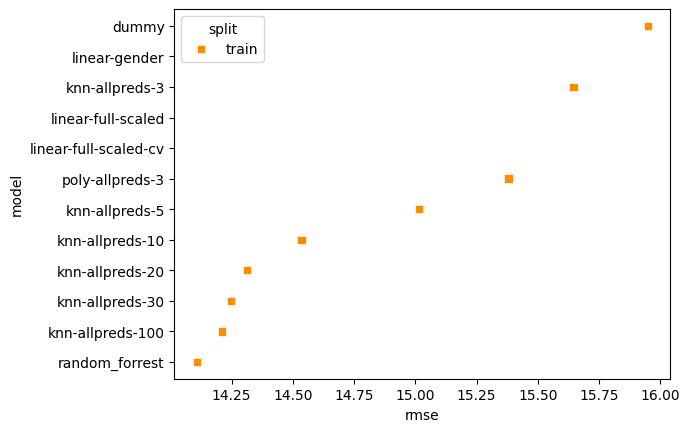

In [128]:
perf_df = pd.DataFrame(performances)
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

In [ ]:
importances = cv_rfr.best_estimator_.feature_importances_
# the above computes the (normalized) total reduction of the criterion brought by that feature.


In [135]:
X_train_predictors_scaled

array([[1, 1802, 0, ..., -0.2554179293693479, 0.4493921567384053,
        0.1634051835715577],
       [2, 1884, 3, ..., -0.18687136405555144, 0.24389806248348778,
        1.5491458170337291],
       [1, 1896, 2, ..., -0.3686818480937487, 0.3035078074202907,
        0.03958267172358388],
       ...,
       [1, 1876, 3, ..., -0.0031294147827394046, 0.0022093397976395545,
        0.006686590866814162],
       [1, 1928, 2, ..., 0.00638688342458488, -0.026688413374974466,
        0.01197159582530955],
       [1, 1860, 1, ..., -0.0016398562035505957, -0.0015439093979730042,
        -0.05443302471431904]], dtype=object)

In [133]:
#train = pd.DataFrame(X_train_predictors_scaled, columns= ["Gender", "Birth yer", "Cluster_no" ""])

In [ ]:
train.columns.tolist()

In [139]:
X_train_predictors_scaled.shape

(515049, 51)

In [138]:
importances.shape

(51,)

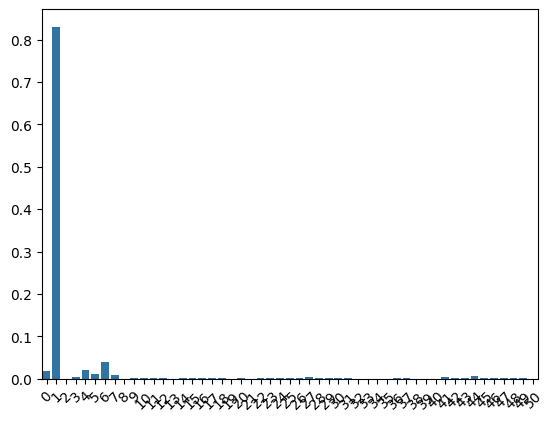

In [151]:
sns.barplot(x=train.columns.tolist(), y=importances, color=sns.color_palette()[0])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.gca().set_xticks(plt.gca().get_xticks()[::2])  # Show every 10th tick # [::10]


plt.show()

### notes down

In [118]:
model1 = LinearRegression()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
k = 5  # Number of splits
cv_scores = cross_val_score(model1, X_train_predictors, y_train, cv=k, scoring=mae_scorer)
mean_cv_score = -np.mean(cv_scores)  # Negate to get positive MAE
print(f"Mean Cross-Validation MAE: {mean_cv_score}")


Mean Cross-Validation MAE: 12.354561707753955


In [119]:
model1.fit(X_train_predictors, y_train)

LinearRegression()

In [120]:
y_pred = model1.predict(X_train_predictors)


KeyboardInterrupt: 

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred)
mae_train

12.343469378464846

In [ ]:
y_train.mean()
y_train.std()

15.928885428768764

In [ ]:
# trying something

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Assuming X and y are your predictors and target variable respectively
X = X_train_predictors
y = y_train

# Number of splits for cross-validation
k = 5

# Step 1: Create the linear regression model
model = LinearRegression()

# Step 2: Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store the evaluation metrics for each fold
mae_scores = []

# Step 3: Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate the mean absolute error for the validation set
    mae = mean_absolute_error(y_val, y_val_pred)
    mae_scores.append(mae)

# Step 4: Calculate and print the mean cross-validation MAE
mean_cv_mae = np.mean(mae_scores)
print(f"Mean Cross-Validation MAE: {mean_cv_mae}")

IndexError: index 405330 is out of bounds for axis 0 with size 405330

# from here and down is mess

In [232]:
X_train_gender = X_train_w_oc_clusters[:,0]

In [234]:
X_train_gender.shape

(515049,)

In [238]:
X_train_gender_reshaped = X_train_gender.reshape(-1, 1)


In [239]:
X_train_gender_reshaped.shape

(515049, 1)

In [235]:
X_train_cluster_year = X_train_w_clusters[:,3:]

In [237]:
X_train_cluster_year

array([[1802, 1],
       [1884, 3],
       [1896, 1],
       ...,
       [1876, 1],
       [1928, 2],
       [1860, 2]], dtype=object)

In [240]:
X_train_w_oc_clusters_predictors = np.hstack((X_train_gender_reshaped, X_train_cluster_year))

In [241]:
X_train_w_oc_clusters_predictors

array([[1, 1802, 1],
       [2, 1884, 3],
       [1, 1896, 1],
       ...,
       [1, 1876, 1],
       [1, 1928, 2],
       [1, 1860, 2]], dtype=object)

In [223]:
y_train

array([51., 95., 70., ..., 68., 57., 42.])

In [226]:
model_linear_regression = LinearRegression()

In [242]:
model_linear_regression.fit(X_train_w_oc_clusters_predictors, y_train)

LinearRegression()

In [245]:
predictions = model_linear_regression.predict(X_train_w_oc_clusters_predictors)

In [247]:
print("Intercept:", model_linear_regression.intercept_)
print("Coefficient:", model_linear_regression.coef_)

# Print the predictions
print("Predictions:", predictions)

Intercept: 35.723330357451005
Coefficient: [ 2.23274723  0.01741172 -0.14764318]
Predictions: [69.18434782 72.54956944 70.82104919 ... 70.47281485 71.23058093
 70.0465842 ]


# Trying something else

In [256]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [252]:

# PCA
pca = PCA(n_components=100)
reduced_embeddings = pca.fit_transform(occupation_embeddings)

# Assume embeddings is your array of text embeddings
kmeans = KMeans(n_clusters=5)
clusters_occupation = kmeans.fit_predict(reduced_embeddings)

# Use original embeddings plus cluster labels as features
features = np.hstack((reduced_embeddings, clusters_occupation.reshape(-1, 1)))


### the code below needs to incluce cross-validation! but not leave-one-out, K splits, maybe 10? 20? 

In [257]:
# Model training
model = RandomForestRegressor()
model.fit(features, y_train)

RandomForestRegressor()

In [ ]:
# compute MAE or something else

In [258]:
val = pd.read_csv(f"data/val.csv", index_col= 0)

In [266]:
y_val = val['Age of death']
X_val = val.drop(columns=['Age of death'])
X_val = X_val.drop(columns = ['Country'])

In [267]:
y_val.head()

0    58.0
1    79.0
2    79.0
3    73.0
4    82.0
Name: Age of death, dtype: float64

In [268]:
X_val.head()

,Gender_encode,Occupation,Birth year
0,1,Military personnel,1895
1,1,Researcher,1802
2,1,Artist,1902
3,1,Politician,1816
4,1,Artist,1811


In [260]:
predictions = model.predict(X_validation)

NameError: name 'X_validation' is not defined